# A Simple Example of Clustering 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

Try with other numbers of clusters and see if they match your expectations. Maybe 7 is going to be a cool one!

Plot the data using the <i> c </i> parameter to separate the data by the clusters we defined.  

<i> Note: c stands for color <i>

## Import the relevant libraries

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

## Load the data

Load data from the csv file: <i> 'Countries.csv'</i>.


In [30]:
countries_data = pd.read_csv(os.path.join(os.path.pardir,'data','raw','3.01. Country clusters.csv'))
countries_data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


## Plot the data

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

In [ ]:
plt.scatter(countries_data['Longitude'],countries_data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)

## Select the features

Create a copy of that data and remove all parameters apart from <i>Longitude</i> and <i>Latitude</i>.

In [ ]:
x = countries_data.iloc[:,1:3]
x

## Clustering

Assume there are only two clusters. 

In [ ]:
kmeans = KMeans(3)

In [ ]:
kmeans.fit(x)

### Clustering Resutls

In [ ]:
identified_clusters = kmeans.fit_predict(x)

In [ ]:
countries_data_cluster = countries_data.copy()

In [ ]:
countries_data_cluster['Clusters'] = identified_clusters

In [ ]:
countries_data_cluster

In [ ]:
plt.scatter(countries_data_cluster['Longitude'],countries_data_cluster['Latitude'], c=countries_data_cluster['Clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)

Did you remember to use the <i> c </i> parameter to separate the data by the clusters we defined?

If you haven't, go back and play around with the number of clusters. 

Try 3, 7 and 8 and see if the results match your expectations!

### Categorical data

In [32]:
# mapping 
mapped_data = countries_data.copy()
mapped_data['Language'] = mapped_data['Language'].map({'English':0,'French':1,'German':2})
mapped_data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2


### Selected features

In [33]:
x = mapped_data.iloc[:,3:4]

In [34]:
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


### Clustering

In [42]:
kmeans = KMeans(4)
kmeans.fit(x)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Clustering Results

In [43]:
identified_clustered = kmeans.fit_predict(x)
mapped_data['Clusters'] = identified_clustered

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)


In [44]:
mapped_data

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,2
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


### Plotting

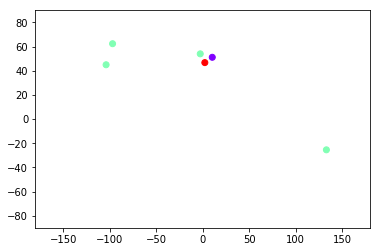

In [45]:
plt.scatter(mapped_data['Longitude'],mapped_data['Latitude'],c=mapped_data['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()